In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools

In [2]:
# Set your working directory
# import os
# os.chdir('/home/ywwang/1121_bigData/')

In [3]:
# Load datasets
car_merge_a = pd.read_csv('./Car_Merge_A.csv') 
car_merge_b = pd.read_csv('./Car_Merge_B.csv')
car_concat = pd.read_csv('./Car_Concat.csv')

### 1.1. [10 pts] Perform an inner join on the "Car_Merge_A'' and "Car_Merge_B" datasets using "car_ID" as the primary key. Then, concatenate the merged dataset with the "Car_Concat" dataset along the row axis. Convert any character columns to factor in R and categorical in Pythons. Note that the remaining 'car_ID' is not one of our variables, delete it or convert it into the index.

- 有讀入資料:2
- 有合併欄位:2
- 有合併筆數:2
- 有轉換資料型態:2
- 有刪除欄位:2

In [4]:
# 1.1 Merge and concatenate
car_merged = pd.merge(car_merge_a, car_merge_b, on='car_ID', how='inner')
car = pd.concat([car_merged, car_concat]).reset_index(drop=True) 

# Convert to factor
car['drivewheel'] = car['drivewheel'].astype('category')

# Set index to car_ID
car.index = car['car_ID']  
car = car.drop('car_ID', axis=1); car

drivewheel  wheelbase  enginesize  boreratio  stroke  compressionratio   
car_ID                                                                          
4             fwd       99.8         109       3.19    3.40              10.0  \
5             4wd       99.4         136       3.19    3.40               8.0   
6             fwd       99.8         136       3.19    3.40               8.5   
7             fwd      105.8         136       3.19    3.40               8.5   
8             fwd      105.8         136       3.19    3.40               8.5   
...           ...        ...         ...        ...     ...               ...   
199           rwd      104.3         130       3.62    3.15               7.5   
200           rwd      104.3         130       3.62    3.15               7.5   
201           rwd      109.1         141       3.78    3.15               9.5   
202           rwd      109.1         141       3.78    3.15               8.7   
205           rwd      109.1         141       3.78    3.15               9.5   

        horsepower  peakrpm  mpg    PRICE  
car_ID                                     
4              102     5500   54  13950.0  
5              115     5500   40  17450.0  
6              110     5500   44  15250.0  
7              110     5500   44  17710.0  
8              110     5500   44  18920.0  
...            ...      ...  ...      ...  
199            162     5100   39  18420.0  
200            162     5100   39  18950.0  
201            114     5400   51  16845.0  
202            160     5300   44  19045.0  
205            114     5400   44  22625.0  

[133 rows x 10 columns]

### 1.2. [10 pts] For continuous variables, create density plots to understand the distribution of the data. For categorical/factor variables, generate frequency tables and bar charts to summarize the counts of each category.

- continuous
  - 有分布圖:6
- categorical/factor
  - 有頻率表格(frequency table):2
  - 有直方圖:2

Method1: apply
drivewheel
fwd    98
rwd    31
4wd     4
Name: count, dtype: int64


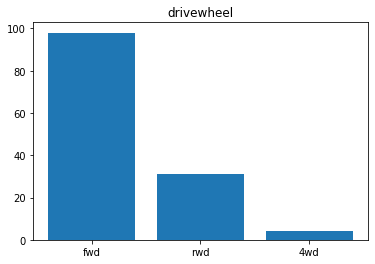

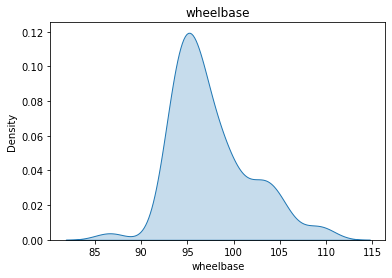

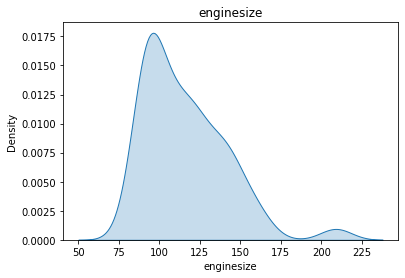

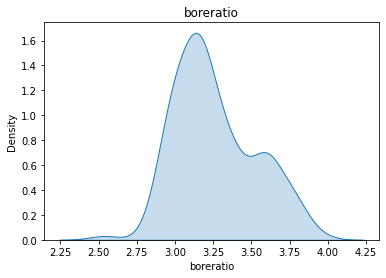

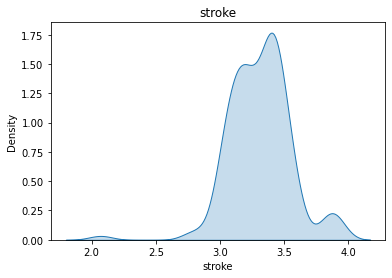

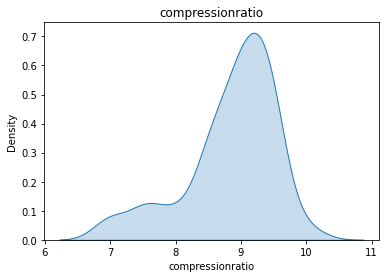

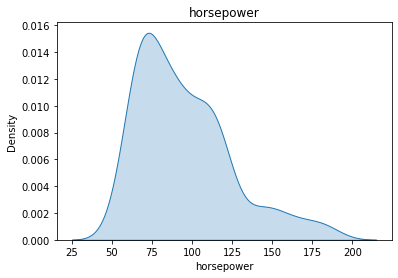

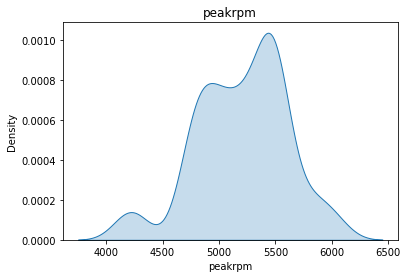

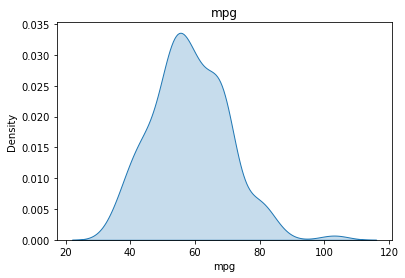

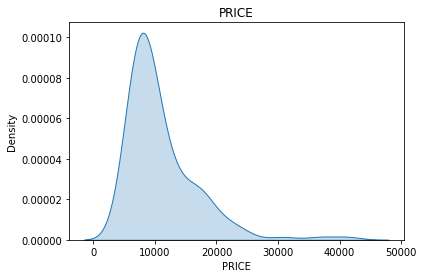

Method2: for loop
drivewheel
fwd    98
rwd    31
4wd     4
Name: count, dtype: int64


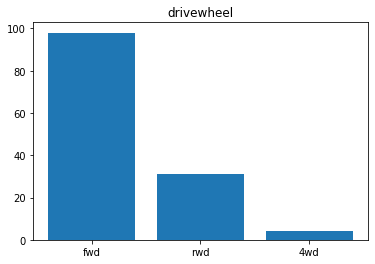

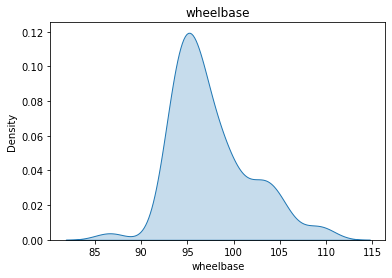

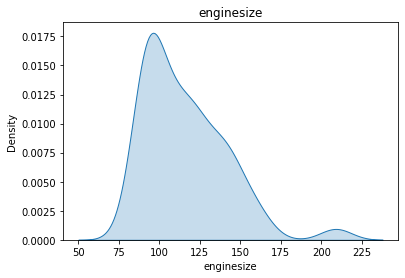

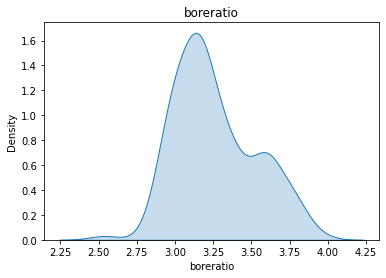

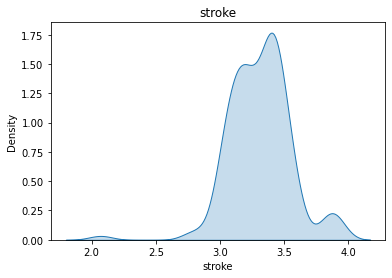

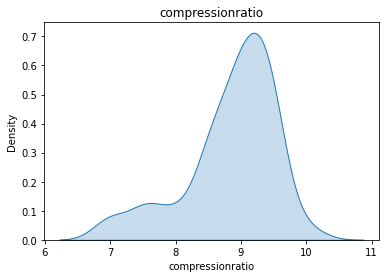

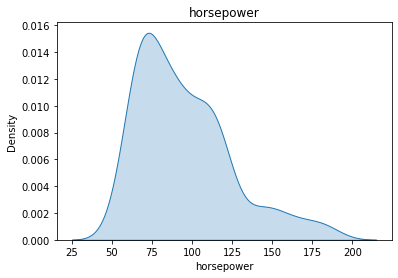

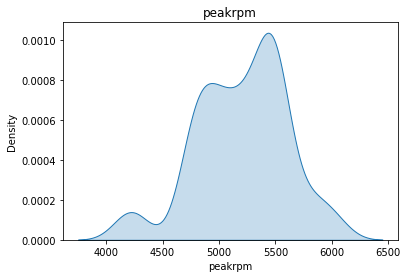

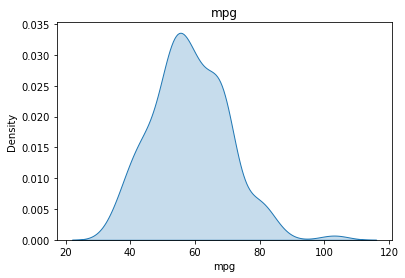

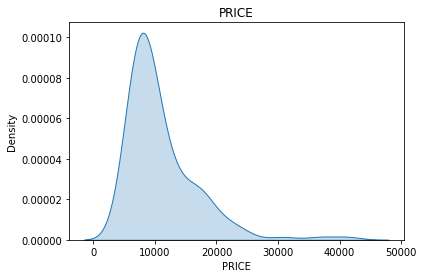

In [5]:
# 1.2 Visualize distributions

## method1: apply
print('Method1: apply\n===============')
# Get numeric and categorical columns
num_cols = car.select_dtypes(exclude='category').columns
cat_cols = car.select_dtypes(include='category').columns
car[cat_cols].apply(lambda x:(print(x.value_counts()),
                              plt.bar(x.value_counts().index, x.value_counts()), 
                              plt.title(x.name), 
                              plt.show()))
car[num_cols].apply(lambda x:(sns.kdeplot(x, fill=True), 
                              plt.title(x.name), 
                              plt.show()))

## method2: for loop
print('Method2: for loop\n===============')
for col in car.columns:
    if car[col].dtype == 'category':
        print(car[col].value_counts())
        plt.bar(car[col].value_counts().index, car[col].value_counts()) 
        plt.title(col)
        plt.show()
    else:
        sns.kdeplot(car[col], fill=True)
        plt.title(col)
        plt.show()

### 1.3. [10 pts] Consider doing a series of bivariate analyses on "PRICE vs. the rest of variables". Specifically, plot your data and perform bivariate statistical tests to understand the relationships among the variables.

- 有雙變量分析結果:5
- 有雙變量圖:5
  - 若有缺少變量斟酌扣分

Method1: apply
                  sum_sq     df          F        PR(>F)
drivewheel  1.610920e+09    2.0  34.980243  6.997551e-13
Residual    2.993399e+09  130.0        NaN           NaN


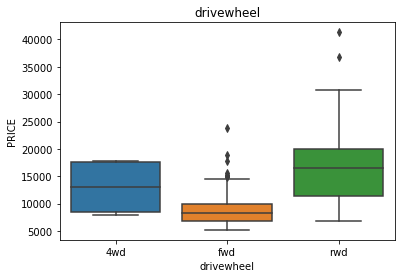

                 sum_sq     df           F        PR(>F)
wheelbase  2.418978e+09    1.0  145.005324  6.032764e-23
Residual   2.185341e+09  131.0         NaN           NaN


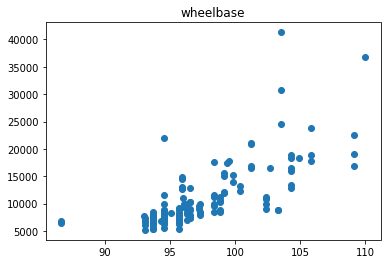

                  sum_sq     df           F        PR(>F)
enginesize  3.283588e+09    1.0  325.690753  2.458073e-37
Residual    1.320731e+09  131.0         NaN           NaN


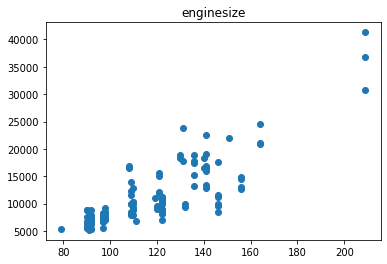

                 sum_sq     df          F        PR(>F)
boreratio  1.524912e+09    1.0  64.870756  4.298655e-13
Residual   3.079407e+09  131.0        NaN           NaN


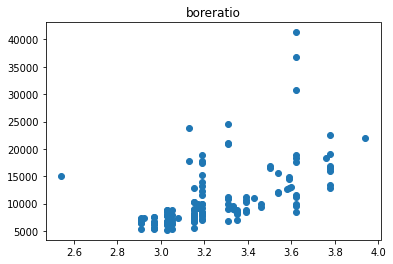

                sum_sq     df         F    PR(>F)
stroke    7.096742e+05    1.0  0.020194  0.887214
Residual  4.603609e+09  131.0       NaN       NaN


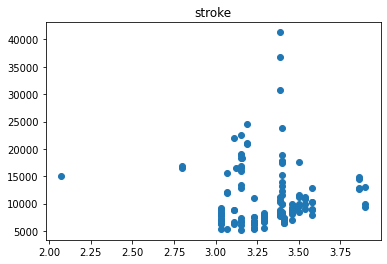

                        sum_sq     df          F    PR(>F)
compressionratio  4.656517e+08    1.0  14.739135  0.000191
Residual          4.138667e+09  131.0        NaN       NaN


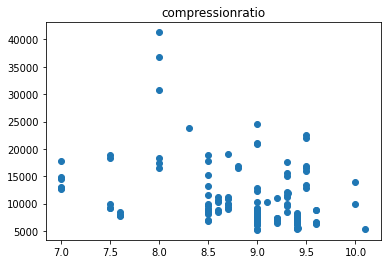

                  sum_sq     df           F        PR(>F)
horsepower  3.131320e+09    1.0  278.481604  3.195866e-34
Residual    1.472998e+09  131.0         NaN           NaN


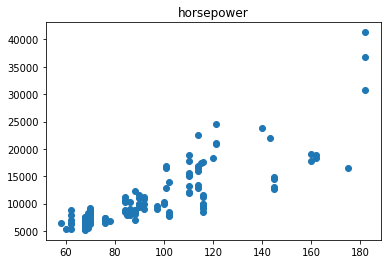

                sum_sq     df      F    PR(>F)
peakrpm   4.217216e+05    1.0  0.012  0.912939
Residual  4.603897e+09  131.0    NaN       NaN


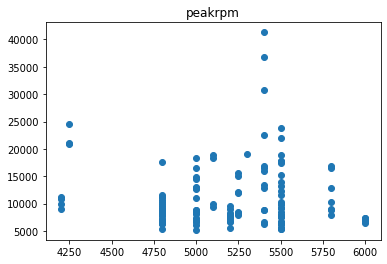

                sum_sq     df           F        PR(>F)
mpg       2.478330e+09    1.0  152.710652  9.820555e-24
Residual  2.125989e+09  131.0         NaN           NaN


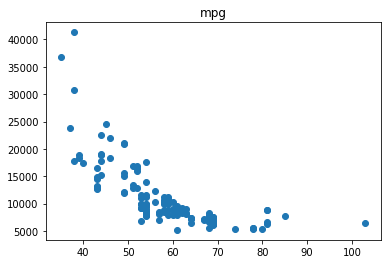

Method2: for loop
                  sum_sq     df          F        PR(>F)
drivewheel  1.610920e+09    2.0  34.980243  6.997551e-13
Residual    2.993399e+09  130.0        NaN           NaN


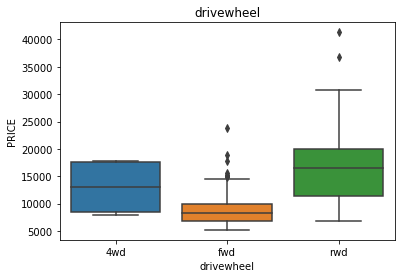

                 sum_sq     df           F        PR(>F)
wheelbase  2.418978e+09    1.0  145.005324  6.032764e-23
Residual   2.185341e+09  131.0         NaN           NaN


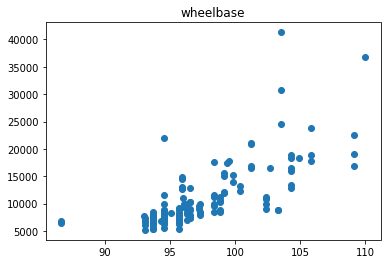

                  sum_sq     df           F        PR(>F)
enginesize  3.283588e+09    1.0  325.690753  2.458073e-37
Residual    1.320731e+09  131.0         NaN           NaN


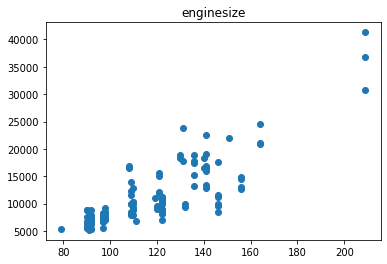

                 sum_sq     df          F        PR(>F)
boreratio  1.524912e+09    1.0  64.870756  4.298655e-13
Residual   3.079407e+09  131.0        NaN           NaN


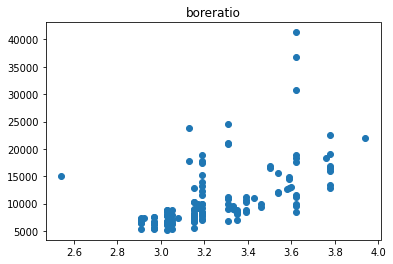

                sum_sq     df         F    PR(>F)
stroke    7.096742e+05    1.0  0.020194  0.887214
Residual  4.603609e+09  131.0       NaN       NaN


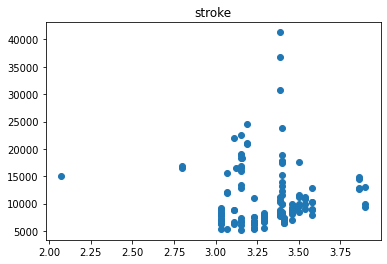

                        sum_sq     df          F    PR(>F)
compressionratio  4.656517e+08    1.0  14.739135  0.000191
Residual          4.138667e+09  131.0        NaN       NaN


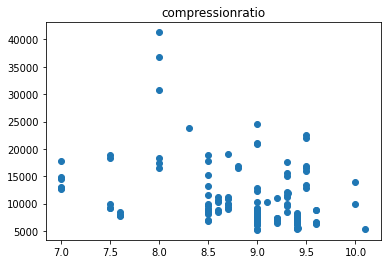

                  sum_sq     df           F        PR(>F)
horsepower  3.131320e+09    1.0  278.481604  3.195866e-34
Residual    1.472998e+09  131.0         NaN           NaN


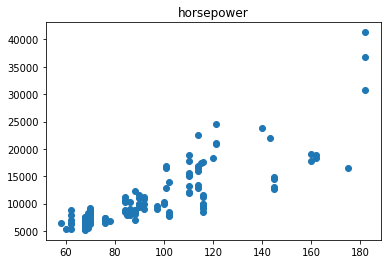

                sum_sq     df      F    PR(>F)
peakrpm   4.217216e+05    1.0  0.012  0.912939
Residual  4.603897e+09  131.0    NaN       NaN


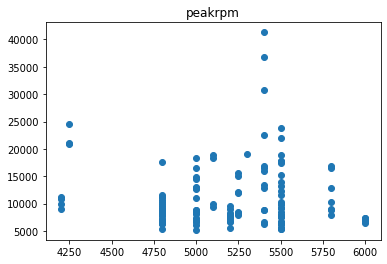

                sum_sq     df           F        PR(>F)
mpg       2.478330e+09    1.0  152.710652  9.820555e-24
Residual  2.125989e+09  131.0         NaN           NaN


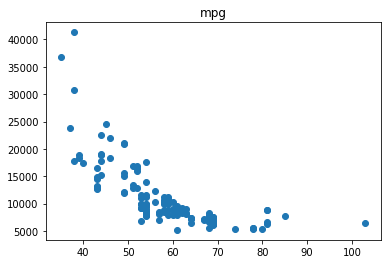

In [6]:
# 1.3 Bivariate analysis  
## Method1: apply
print('Method1: apply\n===============')
price_cols = car.columns[0:len(car.columns)-1]
car[price_cols].apply(lambda x:(print(sm.stats.anova_lm(ols('PRICE ~ ' + x.name, data=car).fit(), typ=2)), 
                                (sns.boxplot(data=car, x=x.name, y='PRICE'), plt.title(x.name), plt.show()) if x.dtype == 'category' 
                                else (plt.scatter(data=car, x=x.name, y='PRICE'), plt.title(x.name), plt.show())))

## Method2: for loop
print('Method2: for loop\n===============')
price_cols = [col for col in car.columns if col != 'PRICE']

for col in price_cols:
    formula = 'PRICE ~ ' + col
    model = ols(formula, data=car).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    if car[col].dtype == 'category':
        sns.boxplot(data=car, x=col, y='PRICE')
        plt.title(col)
        plt.show()
    else:
        plt.scatter(data=car, x=col, y='PRICE')
        plt.title(col)
        plt.show()

### 1.4. [10 pts] Please perform normality tests on PRICE. Does it seem "normal"? If not, do you think fitting general linear models to predict or explain the outcome is appropriate?

- 有常態分析:6
- 有根據結果回答是否常態:2
- 有根據結果回答是否適合:2

有時我們會被圖片誤導，通常圖片僅是統計數據的佐證，所以會需要數據，請使用shapiro, normaltest...等統計分析數據，若僅有分析圖(e.g. Q-Q plot)扣3分

In [7]:
# 1.4 Normality test
print(stats.normaltest(car['PRICE'])) # pvalue < 0.05 means non-normal
# No, it seems not normal. General linear model may not be appropriate.

NormaltestResult(statistic=82.31225277583974, pvalue=1.3369692331136603e-18)


### 1.5. [10 pts] Consider fitting linear models with manually selected variables (i.e., multivariate analysis). What is your best model? You may consider those variables with "p < 0.05".

- 有測試不同變數組合的線性模型:8
- 有一個認為最好的模型:2

僅測試了一個，請多測試其他模型才能比較好壞，但模型使用方式無誤，斟酌扣2分(若後續題目也沒使用不同模型時扣分)

請指出哪一個模型是你們認為最好的，並附上數據或理由解釋為何選擇了1-5的變數

In [8]:
# 1.5 Linear models
formula_select = 'PRICE ~ wheelbase + enginesize + boreratio + stroke + horsepower + peakrpm' # customize
lm_select = ols(formula_select, data=car).fit() 
print(lm_select.summary())

formula_all = 'PRICE ~ ' + ' + '.join(price_cols) # all
lm_all = ols(formula_all, data=car).fit()
print(lm_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           6.35e-53
Time:                        10:15:46   Log-Likelihood:                -1208.5
No. Observations:                 133   AIC:                             2431.
Df Residuals:                     126   BIC:                             2451.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   7870.461     -2.049      0.0

### 1.6. [5 pts] Split the Car dataset into 70% training and 30% testing sets using random seed “20230929”. Using the training set, build multiple linear regression models with the predictor variables selected in previous analyses.

- 有分訓練集和測試集:2
- 有根據70/30分群:1
- 有使用種子20230929(random seed):1
- 有將訓練集代入模型測試:1

In [9]:
# 1.6 Train test split             
train, test = train_test_split(car, test_size=0.3, random_state=20230929)

## Fit on training set
formula_select = 'PRICE ~ wheelbase + enginesize + boreratio + stroke + horsepower + peakrpm' # customize
tr_lm_select = ols(formula_select, data=train).fit() 
print(tr_lm_select.summary())

tr_lm_all = ols(formula_all, data=train).fit() # 1.5.
print(tr_lm_all.summary())

pairs = itertools.combinations(train.drop(['PRICE'], axis=1).columns, 2) # Get all pairs of interactions
int_terms = np.array(pd.Series(pairs).apply(lambda x:'{}:{}'.format(x[0], x[1]))) # Build interaction string
formula_all2way = 'PRICE ~ ' + ' + '.join(price_cols) + ' + ' + ' + '.join(int_terms)
tr_lm_all2way = ols(formula_all2way, data=train).fit()
print(tr_lm_all2way.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.37e-42
Time:                        10:15:47   Log-Likelihood:                -836.98
No. Observations:                  93   AIC:                             1688.
Df Residuals:                      86   BIC:                             1706.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3321.6212   8868.046      0.375      0.7

### 1.7. [5 pts] Computes Root Mean Square Error (RMSE), which is defined as: $RMSE = \surd{(\frac{1}{n}\sum^{n}_{i=1}(y_i - \hat{y_i})^2})$ where $y_i$ and $\hat{y_i}$ are actual and predicted values, respectively. Then apply your linear models to the training and testing sets, train_d and test_d. What are the RMSEs of your models? What is your best model in terms of accuracy of prediction (with lowest RMSE)?

- RMSE架構正確:2 
- 有使用RMSE在訓練集:1
- 有使用RMSE在測試集:1 
- 有根據結果選擇最好的模型:1 

使用RMSE在訓練集的一個用處是可以看到模型有沒有訓練好，和測試集的結果互相比較時也能看到模型有沒有overfit，若沒有會扣1分

希望你們能多嘗試於多個模型才能比較哪些模型表現算好、或算壞，若沒有比較模型的RMSE，或是沒有提供合理理由，會當作沒有根據結果選擇最好的模型

train-test是使用同一個模型的，不是用同一個模型的train RMSE和test RMSE去比較說"training模型比testing模型好"，而是二或多個模型分別(1)fit training set、(2)predict training and testing set，最後互相比較train-test RMSE組合，去判斷模型好壞，可以多嘗試多個模型(不同變數組合)，比較哪些模型RMSE算好、或算壞，通常誤差要小才是好的模型，對train-test測試的了解明顯錯誤時，不給分

In [10]:
# 1.7 RMSE function and evaluation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# select
print('Select :')
y_pred = tr_lm_select.predict(train)
print(rmse(train['PRICE'], y_pred))
y_pred = tr_lm_select.predict(test) 
print(rmse(test['PRICE'], y_pred))
# all
print('All : ')
y_pred = tr_lm_all.predict(train)
print(rmse(train['PRICE'], y_pred))
y_pred = tr_lm_all.predict(test) 
print(rmse(test['PRICE'], y_pred))
# all2way
print('All 2-way : ')
y_pred = tr_lm_all2way.predict(train)
print(rmse(train['PRICE'], y_pred))
y_pred = tr_lm_all2way.predict(test) 
print(rmse(test['PRICE'], y_pred)) # you can see overfitting

Select :
1960.2085120571026


3047.786000555735
All : 
1934.5537163741087
3277.53562568278
All 2-way : 
1020.0279529566941
49216.34506516949


### 1.8. [10 pts] Run summary() to get more information about your linear models, and report the variables with p-value < 0.05. Also run any correlation tests and report the variables with high correlations. Do you think the correlation coefficient is a good measurement for variable importance ranking?

- 有使用summary():2
- 有相關性測試(test and report):6
- 有回答相關性測試是否適合判斷變數重要性:2

請用於測試與PRICE的關係，斟酌扣2分

In [11]:
# 1.8 Model diagnostics
print(tr_lm_all.summary()) 
num_cols = car.select_dtypes(exclude='category').columns
num_cols = num_cols[0:len(num_cols)-1]

## Method1: apply
print('Method1: apply\n==============')
car[num_cols].apply(lambda x: (print('【', x.name, '】''corr :', 
                                     stats.pearsonr(x, car['PRICE'])[0], 
                                     ';p_value : ', 
                                     stats.pearsonr(x, car['PRICE'])[1])))

## Method2: for loop
print('Method2: for loop\n==============')
for col in num_cols:
    # Calculate Pearson correlation
    corr, p_value = stats.pearsonr(car[col], car['PRICE'])
    print('【', col, '】''corr :', corr, ';p_value : ', p_value)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     84.41
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.09e-39
Time:                        10:15:47   Log-Likelihood:                -835.75
No. Observations:                  93   AIC:                             1694.
Df Residuals:                      82   BIC:                             1721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2986.3196   1.17e+0